In [29]:
import pandas as pd
import openpyxl

In [30]:
#pd.set_option("display.max_rows", None)

listaEmprestimo = []

for x in range(0,10):# criei um loop para executar 10 vezes o X vai assumir o valor de 0 até 9
    for y in range(1,3):# criei outro loop dentro do loop anterior, para executar 2 vezes, já que tenho arquivo 2020.1 e 2020.2  p y vai receber 1 e 2
        tabela1= pd.read_csv(f"dados_emprestimos\emprestimos-201{x}{y}.csv")# com o x recebendo 0 e o Y recebendo 1 e depois 2 os dados ficam salvos na variável
    listaEmprestimo.append(tabela1)# dentro da lista listaEmprestimo os dados são salvos, já que na variável tabela1 serão apagados no segundo loop
tabela = pd.read_csv("dados_emprestimos\emprestimos-20201.csv") # salva na variável tabela o valor do CSV final 20201 * vou melhorar isso depoislistaEmprestimo.append(tabela) # salva esse último dado na listalistaEmprestimo    
dfconca1= pd.concat(listaEmprestimo)#com os dados da lista listaEmprestimo, criei um 


In [31]:
dados_exp = pd.read_parquet("dados_exemplares.parquet")#importa dentro da variável dados_exp os dados do arquivo dados_exemplares.parquet
dfcomp = pd.merge( dados_exp, dfconca1, indicator=True, how="outer" ) #juntei os dois dataframe
dfcomp= dfcomp.drop("registro_sistema", axis=1 )# deletei a coluna "registro_sistema"
dfcomp['matricula_ou_siape'] = dfcomp['matricula_ou_siape'].astype(str) #usando a função map() para converter a coluna em String

In [32]:
def CDU_nova (valor):

    if (valor < 100):
        return "Generalidades. Ciência e conhecimento"
    elif (valor < 200):
        return "Filosofia e psicologia"
    elif (valor < 300):
        return "Religião"
    elif (valor < 400):
        return "Ciências sociais"
    elif (valor < 500):
        return "Classe vaga. Provisoriamente não ocupada"
    elif (valor < 600):
        return "Matemática e ciências naturais"
    elif (valor < 700):
        return "Ciências aplicadas"
    elif (valor < 800):
        return "Belas artes"
    elif (valor < 900):
        return "Belas artes "
    elif (valor < 1000):
        return "Geografia. Biografia. História"

dfcomp["CDU"] = dfcomp['localizacao'].apply(CDU_nova)
#cria uma coluna nova e com base na coluna localização, aplica a função CDU_nova, o valor inserido na linha entra como valor da função


In [33]:
Mudar = ["data_renovacao","data_emprestimo","data_devolucao"]
#dfcomp = pd.to_datetime(dfcomp[Mudar], format='%Y%m%d', errors='ignore')
#dfcomp[Mudar]= pd.to_datetime(dfcomp[Mudar])#.apply(lambda x : x.dt.year)
for x in Mudar:

    dfcomp[x] = pd.to_datetime(dfcomp[x])

#dfcomp["data_renovacao"] = pd.to_datetime(dfcomp["data_renovacao"], format="%d-%m-%Y", errors="ignore")


#dfcomp = [pd.to_datetime(dfcomp[i], format='%d/%m/%Y') for i in dfcomp[Mudar] ]
#dfcomp.info()
dfcomp.dropna(subset= "data_emprestimo", inplace=True)

In [34]:
from datetime import datetime
dfcomp["Ano"] = dfcomp["data_emprestimo"].dt.year.astype(int) # Crir uma nova coluna e usar o formato datetime para pegar o Ano e transformar em int
dfcomp["Mes"] = dfcomp["data_emprestimo"].dt.month.astype(int)# Crir uma nova coluna e usar o formato datetime para pegar o Mes e transformar em int
dfcomp["Dia"] = dfcomp["data_emprestimo"].dt.day.astype(int)# Crir uma nova coluna e usar o formato datetime para pegar o Dia e transformar em int
dfcomp["Hora"] = dfcomp["data_emprestimo"].dt.hour.astype(int)# Crir uma nova coluna e usar o formato datetime para pegar o Hora e transformar em int

#vetor = dfcomp["Ano"].dt.year
#vetor = vetor.datetime.datetime.year
dfcomp


,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,id_emprestimo,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,_merge,CDU,Ano,Mes,Dia,Hora
14,27.0,L000133_11/05/2018 08:57:56,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,691.0,818501.0,NaT,2010-08-17 17:00:04.440,2010-08-17 17:09:15,2010059654.0,ALUNO DE GRADUAÇÃO,both,Ciências aplicadas,2010,8,17,17
24,43.0,L000154,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616.0,2037061.0,2015-08-24 21:55:47.110,2015-08-03 10:39:42.972,2015-10-19 08:52:30,2013034289.0,ALUNO DE GRADUAÇÃO,both,Ciências aplicadas,2015,8,3,10
52,100.0,L144235,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,650.0,800617.0,2010-07-21 11:39:18.519,2010-07-06 12:24:32.049,2010-08-09 17:54:20,2008031519.0,ALUNO DE GRADUAÇÃO,both,Ciências aplicadas,2010,7,6,12
53,100.0,L144235,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,650.0,1777409.0,2014-08-04 15:18:17.585,2014-07-18 11:12:45.416,2014-08-20 08:22:38,2012935478.0,ALUNO DE GRADUAÇÃO,both,Ciências aplicadas,2014,7,18,11
55,102.0,L136078,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,610.0,819393.0,NaT,2010-08-18 15:38:57.170,2010-09-13 17:55:00,2010101332.0,ALUNO DE PÓS-GRADUAÇÃO,both,Ciências aplicadas,2010,8,18,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436360,NaN,C017857,NaN,NaN,NaN,NaN,2961958.0,2020-01-18 10:55:31.325,2019-12-20 08:47:33.864,2020-02-18 14:24:07,20192014512.0,ALUNO DE PÓS-GRADUAÇÃO,right_only,None,2019,12,20,8
1436361,NaN,L115715,NaN,NaN,NaN,NaN,2962007.0,2020-01-19 03:04:40.200,2019-12-20 12:17:32.981,2020-02-17 17:37:19,20192002450.0,ALUNO DE PÓS-GRADUAÇÃO,right_only,None,2019,12,20,12
1436362,NaN,Y021157,NaN,NaN,NaN,NaN,2962191.0,2020-01-09 11:38:57.369,2019-12-23 16:47:56.396,2020-01-31 11:02:58,20190022453.0,ALUNO DE GRADUAÇÃO,right_only,None,2019,12,23,16
1436363,NaN,L203120,NaN,NaN,NaN,NaN,2962493.0,2020-01-14 08:59:01.407,2019-12-30 16:30:58.224,2020-02-13 14:21:34,1125233.0,DOCENTE,right_only,None,2019,12,30,16


In [12]:

DadosAnalise = dfcomp.groupby(by=["Hora"]).count()
#DadosAnalise["id_exemplar"].sum
#DadosAnalise.to_excel("dadosok.xlsx")
DadosAnalise = DadosAnalise[["data_emprestimo", "_merge" ]]
#DadosAnalise = DadosAnalise.rename(columns=  {"data_emprestimo": "Quantidade_emprestimo"})
#DadosAnalise2 = dfcomp["data_emprestimo"]
#DadosAnalise3 = DadosAnalise.merge(DadosAnalise2 , left_index=True, right_index=True)
#
DadosAnalise

,data_emprestimo,_merge
Hora,,
0,61,61
6,15,15
7,10225,10225
8,53973,53973
9,69452,69452
10,95592,95592
11,90070,90070
12,74068,74068
13,65233,65233


d:\Programas\python\lib\site-packages\pandas\plotting\_matplotlib\core.py:807: UserWarning: The label '_merge' of <matplotlib.lines.Line2D object at 0x000002BA5813C070> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles, labels, loc="best", title=title)


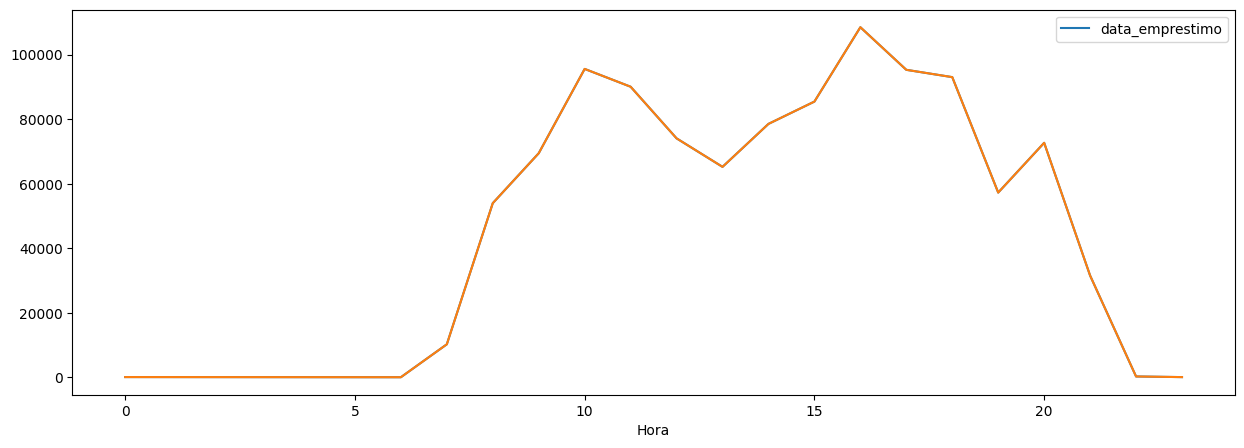

In [18]:

teste= DadosAnalise.plot(figsize=(15,5))

In [19]:
PlanFerias = dfcomp[["data_emprestimo", ]]
PlanFerias

,data_emprestimo
14,2010-08-17 17:00:04.440
24,2015-08-03 10:39:42.972
52,2010-07-06 12:24:32.049
53,2014-07-18 11:12:45.416
55,2010-08-18 15:38:57.170
...,...
1436360,2019-12-20 08:47:33.864
1436361,2019-12-20 12:17:32.981
1436362,2019-12-23 16:47:56.396
1436363,2019-12-30 16:30:58.224


In [20]:
DF_coleta = dfcomp[["biblioteca","tipo_vinculo_usuario", "colecao", "data_emprestimo"]]
DF_coleta = DF_coleta.groupby(by=["biblioteca","tipo_vinculo_usuario", "colecao"]).count()
DF_coleta.sort_values(by="data_emprestimo",ascending=True , inplace=True)
DF_coleta.sort_values(by="tipo_vinculo_usuario",ascending=False , inplace=True)
DF_coleta

,,,data_emprestimo
biblioteca,tipo_vinculo_usuario,colecao,
Biblioteca Setorial Prof. Alberto Moreira Campos - ­Departamento de Odontologia,USUÁRIO EXTERNO,Multimeios,1
Biblioteca Setorial Árvore do Conhecimento - Instituto do Cérebro - ICe,USUÁRIO EXTERNO,Acervo Circulante,4
Biblioteca Setorial do Centro Ciências Sociais Aplicadas - CCSA,USUÁRIO EXTERNO,Acervo Circulante,4
Biblioteca Setorial do Departamento de Artes - DEART,USUÁRIO EXTERNO,Acervo Circulante,14
Biblioteca Setorial Prof. Ronaldo Xavier de Arruda - CCET,USUÁRIO EXTERNO,Acervo Circulante,20
...,...,...,...
Biblioteca Central Zila Mamede,ALUNO DE GRADUAÇÃO,Eventos,14
Biblioteca Setorial Profª. Maria Lúcia da Costa Bezerra - ­CERES­ - Caicó,ALUNO DE GRADUAÇÃO,Obras de Referência,14
Biblioteca Setorial Pe. Jaime Diniz - Escola de Música - EMUFRN,ALUNO DE GRADUAÇÃO,Folhetos,16


In [21]:
colecao = dfcomp[["colecao", "data_emprestimo"]]
colecao = colecao.groupby(by="colecao").count()
colecao.sort_values(by="data_emprestimo", ascending = True, inplace=True)
colecao

,data_emprestimo
colecao,
Obras Raras,4
Coleção Zila Mamede,13
Literatura de Cordel,13
Coleção Mossoroense,24
Eventos,43
Necessidades Educacionais Específicas,50
Trabalho Acadêmico,66
Folhetos,138
Teses,324


In [22]:
biblioteca = dfcomp[["biblioteca", "data_emprestimo"]]
biblioteca = biblioteca.groupby(by="biblioteca").count()
biblioteca.sort_values(by="data_emprestimo", ascending=True, inplace=True)
biblioteca

,data_emprestimo
biblioteca,
Biblioteca Setorial do Núcleo de Ensino Superior do Agreste - NESA - Nova Cruz,323
Biblioteca Setorial Árvore do Conhecimento - Instituto do Cérebro - ICe,433
Biblioteca Setorial Moacyr de Góes - CE,487
Biblioteca Setorial Prof. Horácio Nicolas Solimo - ­ Engenharia Química - EQ - CT,2086
Biblioteca Setorial Prof. Dr. Marcelo Bezerra de Melo Tinôco - DARQ - ­CT,2348
Biblioteca Setorial do Centro Ciências Sociais Aplicadas - CCSA,5052
Biblioteca Setorial Prof. Leopoldo Nelson - ­Centro de Biociências - CB,5987
Biblioteca Setorial do Departamento de Artes - DEART,8417
Biblioteca Setorial Pe. Jaime Diniz - Escola de Música - EMUFRN,10403


In [35]:
valida = dfcomp.loc[(dfcomp["tipo_vinculo_usuario"] == "ALUNO DE GRADUAÇÃO") | (dfcomp["tipo_vinculo_usuario"] == "ALUNO DE PÓS-GRADUAÇÃO") ]
valida = valida.loc[(valida["Ano"] > 2010) & (valida["Ano"] < 2020) ]
Analise_quar = valida[["colecao","tipo_vinculo_usuario", "data_emprestimo", "Ano", "Mes"]]
Analise_quar = Analise_quar.groupby(by=["Ano", "Mes", "colecao", "tipo_vinculo_usuario"]).count()
Analise_quar

data_emprestimo
Ano  Mes colecao             tipo_vinculo_usuario                   
2011 7   Acervo Circulante   ALUNO DE GRADUAÇÃO                 6003
                             ALUNO DE PÓS-GRADUAÇÃO             1945
         Dissertações        ALUNO DE GRADUAÇÃO                    5
                             ALUNO DE PÓS-GRADUAÇÃO               14
         Eventos             ALUNO DE GRADUAÇÃO                    1
...                                                              ...
2019 12  Multimeios          ALUNO DE GRADUAÇÃO                    7
                             ALUNO DE PÓS-GRADUAÇÃO                1
         Obras de Referência ALUNO DE GRADUAÇÃO                   23
                             ALUNO DE PÓS-GRADUAÇÃO                8
         Teses               ALUNO DE GRADUAÇÃO                    1

[886 rows x 1 columns]

In [13]:
f_emprestimo = dfcomp.loc[(dfcomp["tipo_vinculo_usuario"] == "ALUNO DE GRADUAÇÃO") | (dfcomp["tipo_vinculo_usuario"] == "ALUNO DE PÓS-GRADUAÇÃO")]
f_emprestimo = f_emprestimo.loc[(dfcomp["Ano"] >= 2010) & (dfcomp["Ano"]<=2020)]
f_emprestimo = f_emprestimo.groupby(by=["Ano", "Mes", "tipo_vinculo_usuario"]).count()
f_emprestimo.sort_values(by="data_emprestimo", ascending=True)
f_emprestimo.to_excel("bibliote.xlsx")

In [34]:
f_emprestimo = dfcomp.loc[(dfcomp["tipo_vinculo_usuario"] == "ALUNO DE GRADUAÇÃO") | (dfcomp["tipo_vinculo_usuario"] == "ALUNO DE PÓS-GRADUAÇÃO")]
f_emprestimo